In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2 as cv


In [2]:
data_path= r'C:\Users\Admin\Desktop\DPL302m\RockPapperScissor\test_img\RPS_data.csv'
df= pd.read_csv(data_path)

In [3]:
def get_image(path=''):
    img= cv.imread(path)
    img= cv.cvtColor(img, cv.COLOR_BGR2YCrCb)
    img= cv.resize(img, dsize=(300,300))
    img[:,:,0]= cv.GaussianBlur(img[:,:,0], ksize=(3,3), sigmaX=1, sigmaY=1)
    res= cv.cvtColor(img, cv.COLOR_YCrCb2RGB)
    return res
df= df.sample(frac=1) #shuffe data
df.iloc[:,0]=df.iloc[:,0].apply(lambda x: get_image(x))
df.iloc[:,0]= df.iloc[:,0].apply(lambda x: np.asarray(x))


(300, 300, 3)


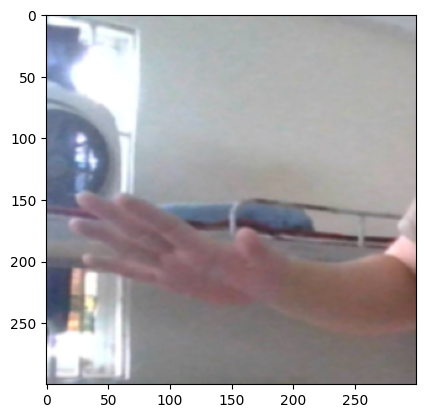

In [4]:

test_img= df.iloc[100,0]
print(test_img.shape)
plt.imshow(test_img)

In [5]:
imgs= df['path'].tolist()
imgs= tf.convert_to_tensor(imgs, dtype=tf.float32)
label= df.iloc[:,1].tolist()
label= tf.convert_to_tensor(label)


In [6]:
x=[]
y=[]
batch_size=15
dset= tf.data.Dataset.from_tensor_slices((imgs,label))
dset= dset.batch(batch_size)
for i in dset.as_numpy_iterator():
    x.append(tf.math.divide(i[0], 255))
    oneHot= tf.one_hot(i[1],depth=4)
    y.append(oneHot)

val_data=(x[len(x)-1], y[len(y)-1])


In [7]:
x_train, x_test, y_train, y_test= train_test_split(x[:len(x)-1], y[:len(y)-1], test_size=0.1, shuffle=True, random_state=0)

In [8]:
class GetBest(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
       if logs.get('accuracy')==1:
           print('the accuracy is bigger than 0.95 so stop')
           self.model.stop_training= True
    

def make_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(300,300,3),batch_size=batch_size),
    tf.keras.layers.Conv2D(32,3),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32,3),
    tf.keras.layers.MaxPool2D(),
    # tf.keras.layers.Conv2D(32,3),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(512, activation=tf.keras.activations.elu, activity_regularizer='L2'),
    tf.keras.layers.Dense(256, activation=tf.keras.activations.elu),
    tf.keras.layers.Dense(128, activation=tf.keras.activations.elu, activity_regularizer='L2'),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.softmax)
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=10e-6), 
        loss=tf.keras.losses.categorical_crossentropy,
        metrics='accuracy'
    )
    
    return model


In [9]:
tf.keras.backend.clear_session() #clear memory
# del model

In [10]:

callback= GetBest()
model= make_model()

In [11]:
 
batch_num= len(x_train)
for t in range(2):
    for i in range(batch_num):
        model.fit(x_train[i], y_train[i], epochs=5, batch_size=batch_size, callbacks=[callback], validation_data=val_data)



Epoch 1/5


NotFoundError: Graph execution error:

Detected at node 'sequential/conv2d_1/Conv2D' defined at (most recent call last):
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Admin\AppData\Local\Temp\ipykernel_2552\1863598393.py", line 4, in <module>
      model.fit(x_train[i], y_train[i], epochs=5, batch_size=batch_size, callbacks=[callback], validation_data=val_data)
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\keras\layers\convolutional\base_conv.py", line 283, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "c:\Users\Admin\.conda\envs\tfGPU\lib\site-packages\keras\layers\convolutional\base_conv.py", line 255, in convolution_op
      return tf.nn.convolution(
Node: 'sequential/conv2d_1/Conv2D'
No algorithm worked!  Error messages:
  Profiling failure on CUDNN engine 1#TC: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
  Profiling failure on CUDNN engine 1: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
  Profiling failure on CUDNN engine 0#TC: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
  Profiling failure on CUDNN engine 0: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
	 [[{{node sequential/conv2d_1/Conv2D}}]] [Op:__inference_train_function_1335]

In [ ]:
#Train and test from dataset
tbatch_num= len(x_test)
for i in  range(tbatch_num):
    model.evaluate(x_test[i], y_test[i], batch_size=batch_size)

In [ ]:
#some real world data
# from numba import cuda 
# device = cuda.get_current_device()
# device.reset()

# data_path= r'C:\Users\Admin\Desktop\DPL302m\RockPapperScissor\test_img'
# rdata= tf.keras.preprocessing.image_dataset_from_directory(data_path, image_size=(128,128), color_mode='rgb', batch_size=None)

# x_r=[]
# y_r=[]
# for i in rdata:
#     x_r.append(tf.math.divide(i[0], 255))
#     oneHot= tf.one_hot(i[1],depth=4)
#     y_r.append(oneHot)

In [ ]:
# model.evaluate(np.array(x_r), np.array(y_r))